Project: Real Time Diabetic Retinopathy detection using CNN

Dataset: https://www.kaggle.com/datasets/sovitrath/diabetic-retinopathy-224x224-gaussian-filtered



Author: Samiul Bari

**Importing All Necessary Modules and Packages**

In [1]:
# pip install tensorflow==2.2.0

In [2]:
# import opendatasets as od
# import pandas

# od.download("https://www.kaggle.com/datasets/sovitrath/diabetic-retinopathy-224x224-gaussian-filtered") #f71ee8768a1e1d2d75715e68b2b7fd41

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
import PIL
import plotly
import plotly.express as px

from sklearn.model_selection import train_test_split
import tensorflow as tf
print(tf.__version__)
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten,Input,ZeroPadding2D,BatchNormalization,Activation
from tensorflow.keras.metrics import BinaryAccuracy, Precision, Recall
from tensorflow.keras import preprocessing

from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

2.16.1


In [4]:
# pip install --upgrade tensorflow

**Importing the dataset**

In [5]:
#Locate the file in Personal Machine
path = '/Users/apple/Downloads/SDP/images'

In [6]:
No_DR_Img = os.listdir(path + '/No_DR/')
Mild_Img = os.listdir(path + '/Mild/')
Moderate_Img = os.listdir(path + '/Moderate/')
Proliferate_DR_Img = os.listdir(path + '/Proliferate_DR/')
Severe_Img = os.listdir(path + '/Severe/')

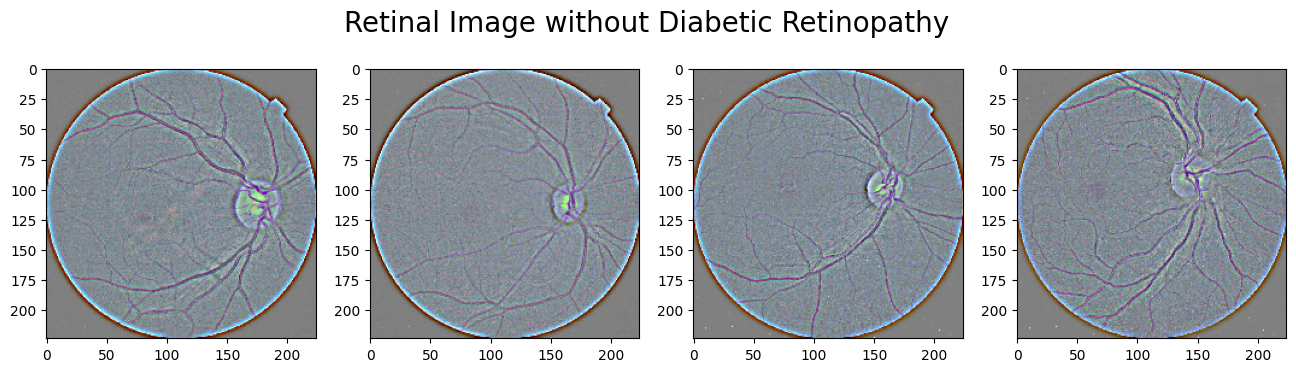

In [7]:
#Viewing the dataset
fig = plt.figure(figsize=(16,4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(path+'/No_DR/'+ No_DR_Img[i])
    plt.imshow(img)
plt.suptitle("Retinal Image without Diabetic Retinopathy",fontsize=20)
plt.show()

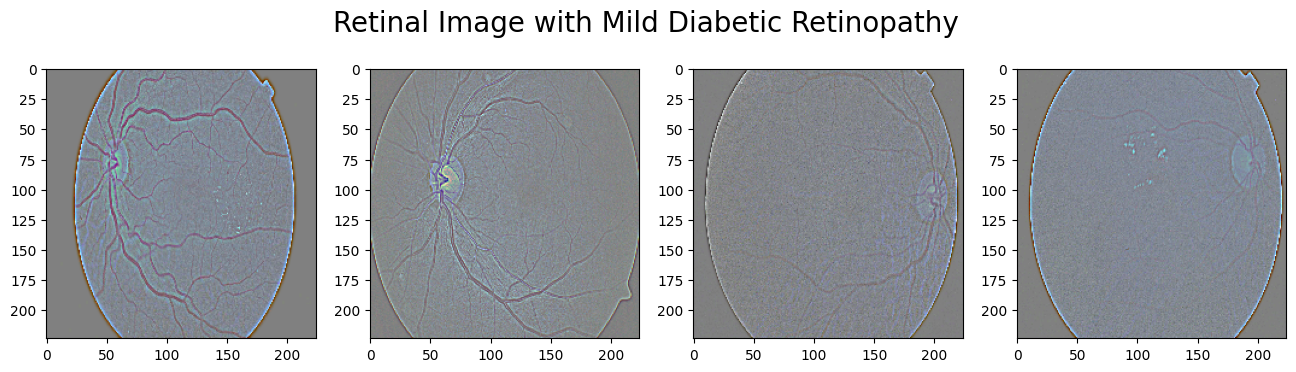

In [8]:
#Viewing the dataset
fig = plt.figure(figsize=(16,4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(path+'/Mild/'+ Mild_Img[i])
    plt.imshow(img)
plt.suptitle("Retinal Image with Mild Diabetic Retinopathy",fontsize=20)
plt.show()

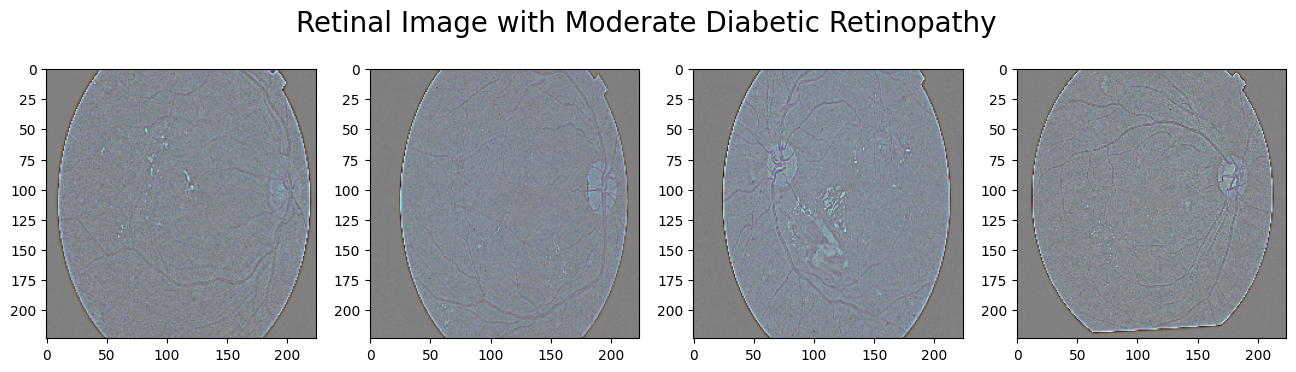

In [9]:
#Viewing the dataset
fig = plt.figure(figsize=(16,4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(path+'/Moderate/'+ Moderate_Img[i])
    plt.imshow(img)
plt.suptitle("Retinal Image with Moderate Diabetic Retinopathy",fontsize=20)
plt.show()

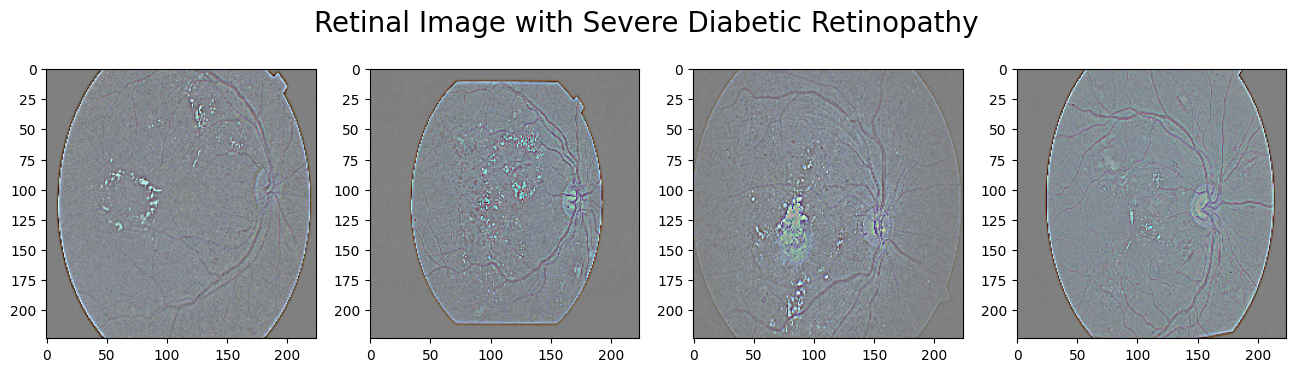

In [10]:
#Viewing the dataset
fig = plt.figure(figsize=(16,4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(path+'/Severe/'+ Severe_Img[i])
    plt.imshow(img)
plt.suptitle("Retinal Image with Severe Diabetic Retinopathy",fontsize=20)
plt.show()

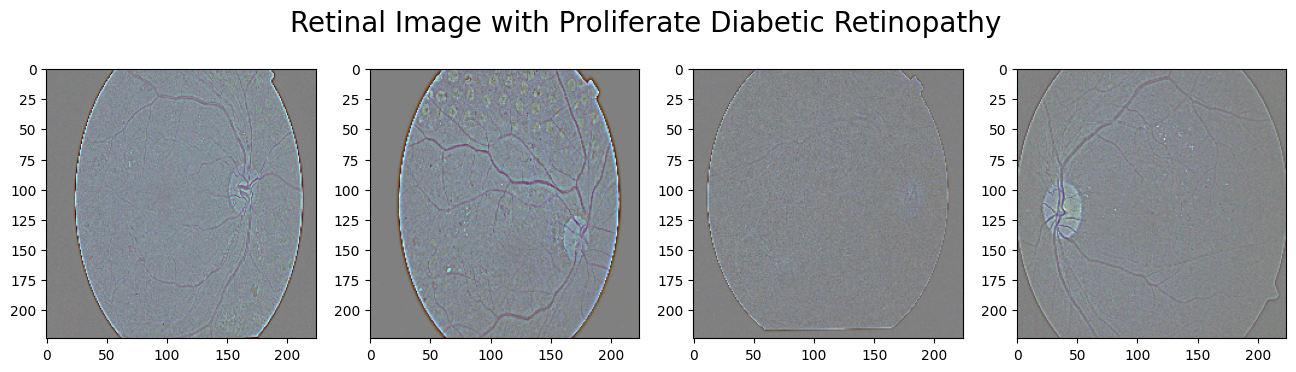

In [11]:
#Viewing the dataset
fig = plt.figure(figsize=(16,4))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread(path+'/Proliferate_DR/'+ Proliferate_DR_Img[i])
    plt.imshow(img)
plt.suptitle("Retinal Image with Proliferate Diabetic Retinopathy",fontsize=20)
plt.show()

In [12]:
Classes = {'No_DR':0, 'Mild':1, 'Moderate':2, 'Severe':3, 'Proliferate_DR':4}

**Data PreProcessing**

In [13]:
for i in Classes:
    print(i)

No_DR
Mild
Moderate
Severe
Proliferate_DR


In [14]:
#Normalizing pixel values
X = []
y = []

for i in Classes:
    folder_path ='/Users/apple/Downloads/SDP/images/' + i
    for j in os.listdir(folder_path):
        img = cv2.imread(folder_path + '/' + j)
        # normalize values
        img = img / 255 #-->Apply normalization because we want pixel values to be scaled to the range 0-1
        X.append(img) #-->Image Array
        y.append(Classes[i]) #-->Label Array

In [15]:
# X, y

In [16]:
X = np.array(X)
y = np.array(y)

X.shape, y.shape

((3662, 224, 224, 3), (3662,))

**Dataset Analysis**

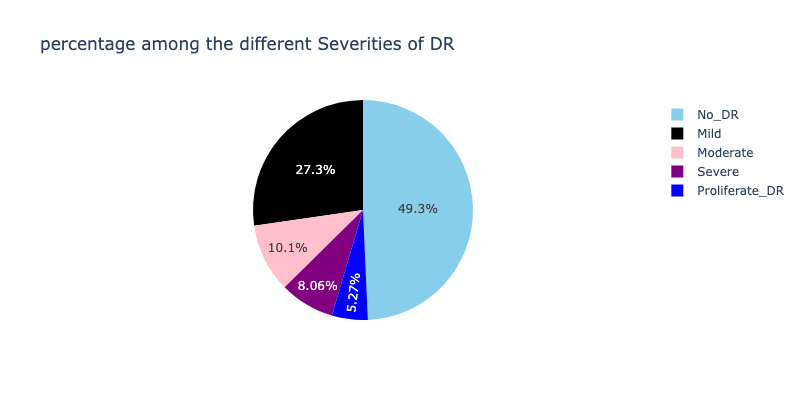

In [17]:
#Class division

Class_series=pd.Series(y)
lis=["No_DR","Mild","Moderate","Severe","Proliferate_DR"]
DR_or_not = Class_series.value_counts().tolist()
values = [DR_or_not[0], DR_or_not[1], DR_or_not[2], DR_or_not[3], DR_or_not[4]]
fig = px.pie(values=Class_series.value_counts(), names=lis , width=800, height=400, color_discrete_sequence=["skyblue","black","pink","purple","blue"]
             ,title="percentage among the different Severities of DR")
fig.show()

In [18]:
# pip install imblearn

In [19]:
from imblearn.over_sampling import SMOTE
#Synthetic Minority Over-sampling Technique (SMOTE) to address class imbalance in the dataset
#Using SMOTE to oversample the minority class(Edema) to avoid class imbalance
sm = SMOTE(random_state = 2)
# print(sm)
sm = SMOTE(random_state = 2)
# print(sm)
X, y = sm.fit_resample(X.reshape(X.shape[0], -1), y.ravel()) #-->This line applies the SMOTE algorithm to oversample the minority class (Edema) in the dataset.

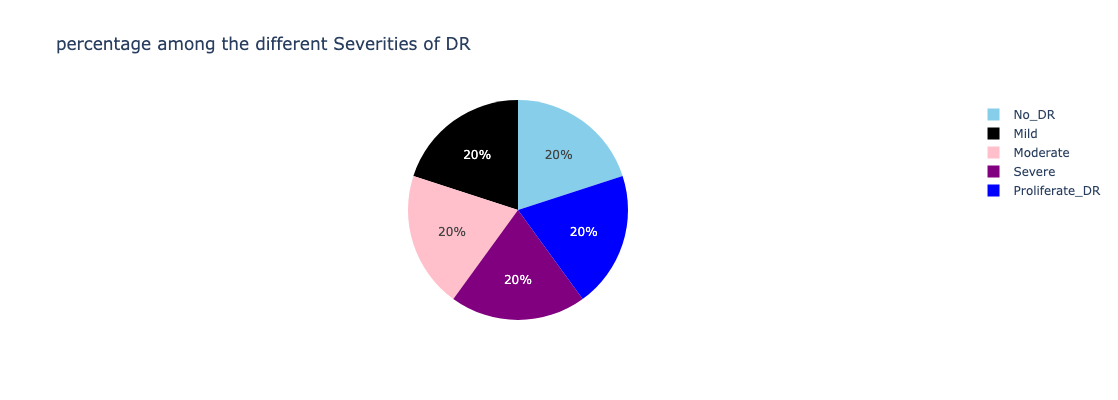

In [20]:
#Class division

Class_series=pd.Series(y)
lis=["No_DR","Mild","Moderate","Severe","Proliferate_DR"]
DR_or_not = Class_series.value_counts().tolist()
values = [DR_or_not[0], DR_or_not[1], DR_or_not[2], DR_or_not[3], DR_or_not[4]]
fig = px.pie(values=Class_series.value_counts(), names=lis , width=800, height=400, color_discrete_sequence=["skyblue","black","pink","purple","blue"]
             ,title="percentage among the different Severities of DR")
fig.show()

In [21]:
# reshaping is done on the oversampled dataset.
X = X.reshape(X.shape[0], 224, 224, 3)

In [22]:
# Used to clean up the memory to get rid of gurbage data
import gc
gc.collect()

36594

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=32, stratify=y)
#used stratify to balance the number of examples for each class

In [24]:
X.shape

(9025, 224, 224, 3)

In [25]:
X_train.shape

(7220, 224, 224, 3)

In [26]:
X_test.shape

(1805, 224, 224, 3)

In [27]:
# Reshaping of X_train and X_test after splitting the dataset ensures that 
# both the training and testing data are in the appropriate format for training and evaluating the model
X_train = X_train.reshape( (-1,224,224,3))
X_test = X_test.reshape((-1,224,224,3))

**Import the Model Architecture (VGG 16)**

In [37]:
from tensorflow.keras.applications.densenet import DenseNet121

In [38]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [39]:
# Error : SSL Error
vgg = DenseNet121(input_shape=(224,224,3),weights='imagenet',include_top=False)

In [40]:
vgg.trainable = True

set_trainable = False

for layer in vgg.layers:
    if layer.name == 'conv5_block16_0_bn':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [41]:
for layer in vgg.layers[:]:
  if ('bn' in layer.name):
    trainable = False

In [42]:
from tensorflow.keras.layers import Dense,Flatten,Input,Dropout,Activation,BatchNormalization,Lambda

In [43]:
x = Flatten()(vgg.output)
x = tf.keras.layers.Dense(128,activation='relu')(x)
x = tf.keras.layers.Dropout(0.4)(x)
prediction = Dense(5,activation='softmax')(x)

In [44]:
from tensorflow.keras.models import Model

In [45]:
model = Model(inputs=vgg.input, outputs=prediction)

In [46]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 230, 230,  │          0 │ input_layer[0][0] │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 112, 112,  │      9,408 │ zero_padding2d[0… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 112, 112,  │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 112, 112,  │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 114, 114,  │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1               │ (None, 56, 56,    │          0 │ zero_padding2d_1… │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 56, 56,    │        256 │ pool1[0][0]       │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_relu │ (None, 56, 56,    │          0 │ conv2_block1_0_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 56, 56,    │      8,192 │ conv2_block1_0_r… │
│ (Conv2D)            │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 56, 56,    │        512 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 56, 56,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 56, 56,    │     36,864 │ conv2_block1_1_r… │
│ (Conv2D)            │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_concat │ (None, 56, 56,    │          0 │ pool1[0][0],      │
│ (Concatenate)       │ 96)               │            │ conv2_block1_2_c… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_bn   │ (None, 56, 56,    │        384 │ conv2_block1_con… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_0_relu │ (None, 56, 56,    │          0 │ conv2_block2_0_b… │
│ (Activation)        │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block2_1_conv │ (None, 56, 56,    │     12,288 │ conv2_block2_0_r

 Total params: 13,460,805 (51.35 MB)

 Trainable params: 6,591,429 (25.14 MB)

 Non-trainable params: 6,869,376 (26.20 MB)

In [47]:
gc.collect()

1574

In [48]:
X=[]
y=[]

In [49]:
from tensorflow.keras.callbacks import EarlyStopping

In [50]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5)

In [52]:
from keras.callbacks import ModelCheckpoint,EarlyStopping

#Early Stopping
es = EarlyStopping(monitor='val_accuracy', min_delta = 0.005, patience=10, verbose=1, mode='auto')
#Model Check Point
mc = ModelCheckpoint(monitor='val_accuracy', filepath = '/Users/apple/Downloads/SDP/densenet/model.keras', verbose=1, save_best_only = True, mode='auto')
cd = [es,mc]

In [53]:
adam = keras.optimizers.Adam(learning_rate=0.00001)
model.compile(loss='sparse_categorical_crossentropy',
              optimizer = adam,
              metrics=['accuracy']
)

In [56]:
model.fit(x=X_train,y=y_train,
          validation_data=(X_test,y_test),
          epochs=10,
          callbacks=cd,
          batch_size = 32,
          shuffle=True)

Epoch 1/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9473 - loss: 0.1913
Epoch 1: val_accuracy improved from 0.90139 to 0.90803, saving model to /Users/apple/Downloads/SDP/densenet/model.keras
226/226 ━━━━━━━━━━━━━━━━━━━━ 627s 3s/step - accuracy: 0.9473 - loss: 0.1914 - val_accuracy: 0.9080 - val_loss: 0.2702
Epoch 2/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9502 - loss: 0.1791
Epoch 2: val_accuracy improved from 0.90803 to 0.92742, saving model to /Users/apple/Downloads/SDP/densenet/model.keras
226/226 ━━━━━━━━━━━━━━━━━━━━ 592s 3s/step - accuracy: 0.9502 - loss: 0.1791 - val_accuracy: 0.9274 - val_loss: 0.2449
Epoch 3/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.9551 - loss: 0.1594
Epoch 3: val_accuracy improved from 0.92742 to 0.92909, saving model to /Users/apple/Downloads/SDP/densenet/model.keras
226/226 ━━━━━━━━━━━━━━━━━━━━ 535s 2s/step - accuracy: 0.9550 - loss: 0.1595 - val_accuracy: 0.9291 - val_loss: 0.2396
Epoch 4/10
226/226 ━━━━━━━━━━━━

In [ ]:
history = model.history.history
model_loss=pd.DataFrame(model.history.history)

In [ ]:
def plot_metrics(history):

    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['accuracy']
    val_acc = history['val_accuracy']

    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()

     # Accuracy
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()

In [ ]:
plot_metrics(history)

In [ ]:
model_loss.plot (figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
Model_evaluation = model.evaluate(X_train, y_train)
print(f"%\nAccuracy: {Model_evaluation[1]*100:.4f} %")

In [ ]:
y_predicted_tf = model.predict(X_test)

In [ ]:
y_predicted_tf

In [ ]:
y_test

In [ ]:
y_predicted =[]
for i in range(1805):
    max_val = y_predicted_tf[i][0]
    classify = 0
    for j in range(5):
        if max_val<y_predicted_tf[i][j]:
            max_val = y_predicted_tf[i][j]
            classify = j
    y_predicted.append(classify)

In [ ]:
y_predicted

In [ ]:
len(y_predicted)

In [ ]:
len(y_test)

In [ ]:
df = pd.DataFrame({"Y_test": y_test , "Y_predicted" : y_predicted})
df.head(8)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score

In [ ]:
f1_score(y_test, y_predicted, average='micro')

In [ ]:
recall_score(y_test, y_predicted, average='micro')

In [ ]:
 precision_score(y_test, y_predicted, average='micro')

In [ ]:
cm = confusion_matrix(y_test, y_predicted)
print(cm)

In [ ]:
cm = confusion_matrix(y_predicted,y_test)

plt.figure(figsize=(5, 4))
ax = plt.subplot()
sns.set(font_scale=1.0)
sns.heatmap(cm, annot=True, fmt='g', cmap="Blues", ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=10);ax.set_ylabel('True labels', fontsize=10);
ax.set_title('Confusion Matrix', fontsize=10);
ax.xaxis.set_ticklabels(['No','Mild','Moderate','Severe','Proliferate'], fontsize=10); ax.yaxis.set_ticklabels(['No','Mild','Moderate','Severe','Proliferate'], fontsize=10);